In [2]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.feature_extraction.text import HashingVectorizer
import numpy as np
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./dataset/combined_dataset.csv')

In [4]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [5]:
df.describe()

,label
count,151254.000000
mean,0.530075
std,0.499096
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151254 entries, 0 to 151253
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   payload  151253 non-null  object
 1   label    151254 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [7]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150568 entries, 0 to 151253
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   payload  150568 non-null  object
 1   label    150568 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


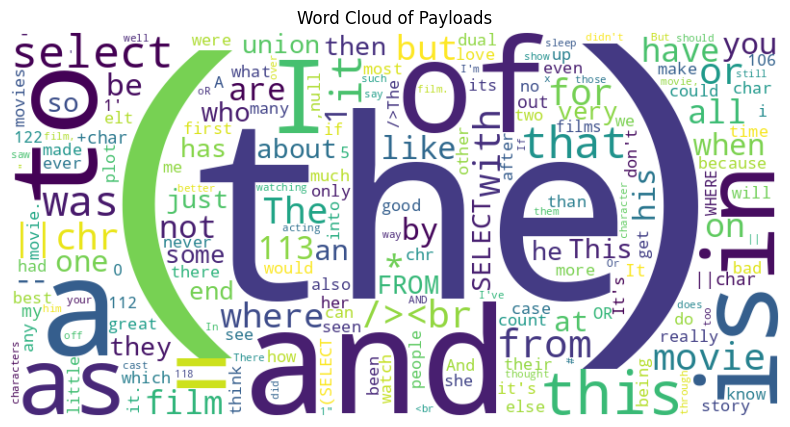

In [9]:
all_text = " ".join(df["payload"])
word_counts = Counter(all_text.split())

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Payloads")
plt.show()

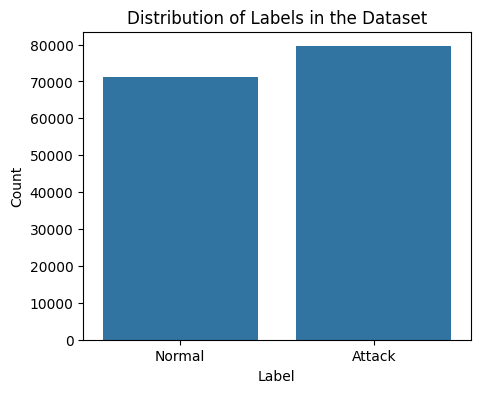

In [10]:
label_counts = df["label"].value_counts()

plt.figure(figsize=(5, 4))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels in the Dataset")
plt.xticks([0, 1], ["Normal", "Attack"])
plt.show()

In [11]:
X = df['payload']
y = df['label']

In [12]:
def preprocess_text(text):

    if not isinstance(text, str):
        text = str(text)
        
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

In [ ]:
X_processed = [preprocess_text(payload) for payload in X]
vectorizer = HashingVectorizer(
    analyzer='char',
    ngram_range=(3, 5),
    n_features=2**20,
    dtype=np.float32
)
X_features = vectorizer.transform(X_processed)
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.3, random_state=42)

In [ ]:
random_forest_model = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    random_state=42
)
random_forest_model.fit(X_train, y_train)

In [36]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(tree_method="hist", n_jobs=-1)
xgb_model.fit(X_train, y_train)